In [48]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
df = pd.read_csv("D:\Elevoo Tasks\Task #1\StudentPerformanceFactors.csv")

In [50]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [52]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [53]:
df.dropna(inplace=True)

In [54]:
df.shape

(6378, 20)

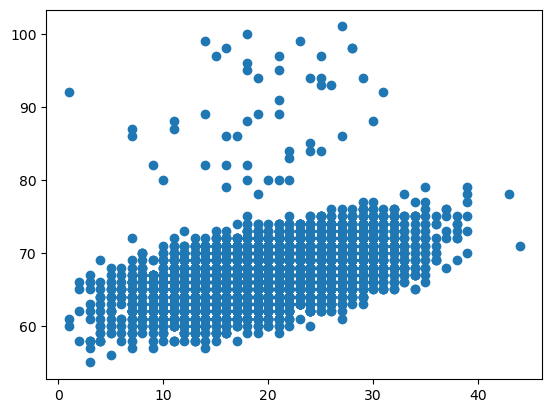

In [55]:
plt.scatter(df['Hours_Studied'] , df['Exam_Score'])

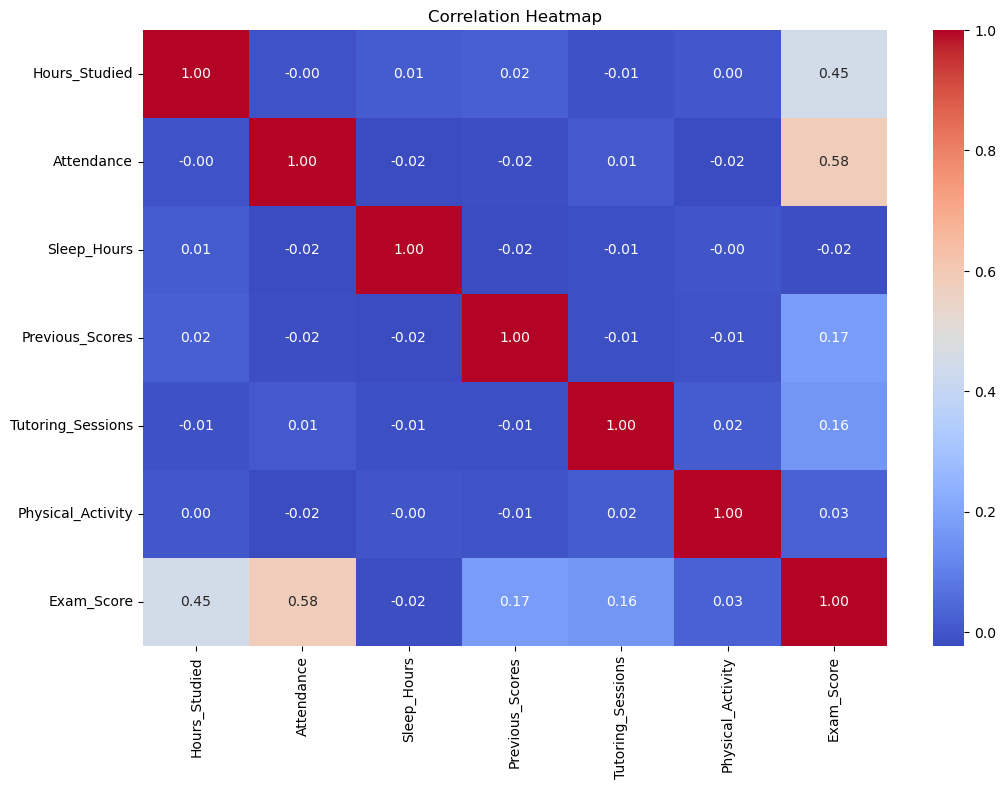

In [56]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

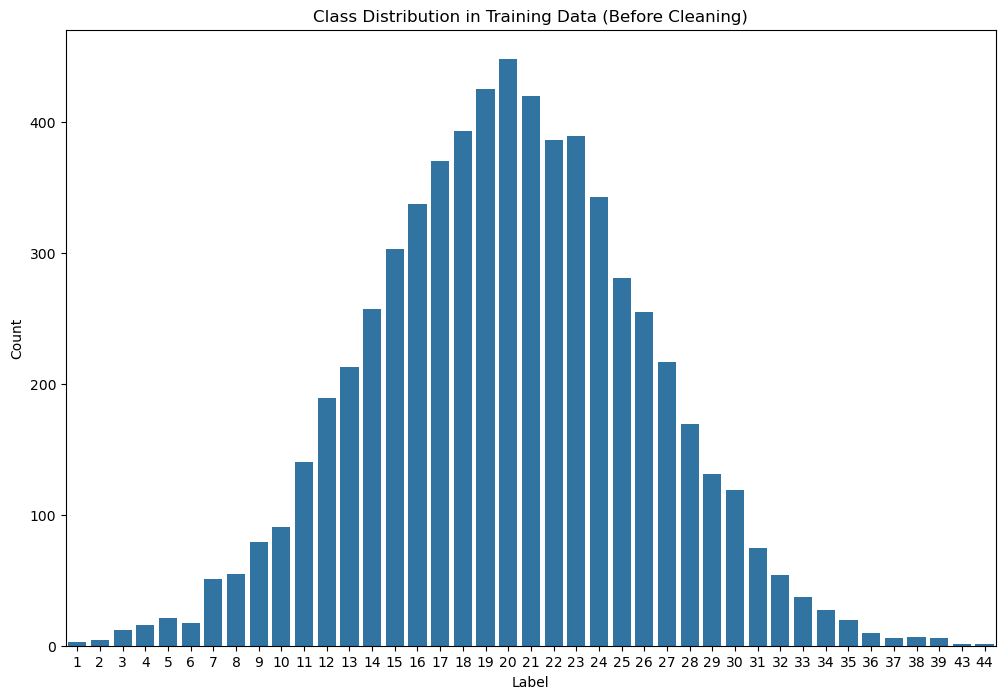

Class distribution in train_df['label']:
Hours_Studied
20    448
19    425
21    420
18    393
23    389
22    386
17    370
24    343
16    337
15    303
25    281
14    257
26    255
27    217
13    213
12    189
28    169
11    140
29    131
30    119
10     91
9      79
31     75
8      55
32     54
7      51
33     37
34     27
5      21
35     20
6      17
4      16
3      12
36     10
38      7
39      6
37      6
2       4
1       3
43      1
44      1
Name: count, dtype: int64


In [57]:
plt.figure(figsize=(12, 8))
sns.countplot(x=df['Hours_Studied'])
plt.title('Class Distribution in Training Data (Before Cleaning)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()
print("Class distribution in train_df['label']:")
print(df['Hours_Studied'].value_counts(dropna=False))

In [58]:
from sklearn.model_selection import train_test_split
X = df[['Hours_Studied']].values
y = df['Exam_Score'].values
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [60]:
model.score(X_test,y_test)*100

22.700990835965694

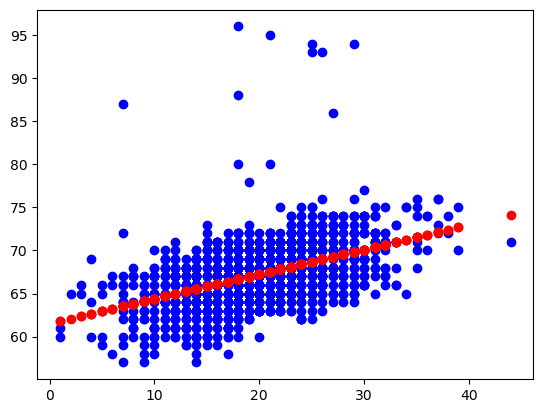

In [61]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted') 